In [1]:
import numpy as np
import pandas as pd
import sys
import json
import os
import copy
import matplotlib.pyplot as plt
import scipy
import multiprocessing
import h5py
import corner
import dynesty

Load save:

In [2]:
dsampler = dynesty.NestedSampler.restore('dynesty_saves/2006_12_09_restricted_new.save')
results = dsampler.results
samples = results.samples
ndim = len(samples.T)

Summary:

In [3]:
results.summary()

Summary
niter: 19426
ncall: 633552
eff(%):  2.892
logz: -172.155 +/-  0.225


In [4]:
samples[-1]

array([1.54443088e+06, 6.83477484e+00, 5.43990355e+00, 1.68302594e+01,
       9.85182763e+01, 1.35475542e-07, 4.36303025e-06, 2.78838814e-07,
       1.27511590e+00, 9.02294271e-01, 1.62915329e+00, 1.62084103e-02,
       7.77244652e+00, 6.96917698e+00, 4.85202592e+00, 5.03870510e-01])

Samples:

Text(0, 0.5, 'mass')

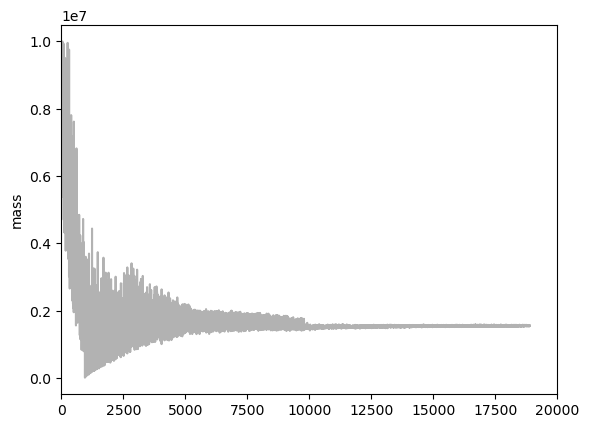

In [5]:
plt.plot(samples[:, 0], 'k', alpha=0.3)
plt.xlim(0, 20000)
plt.ylabel('mass')

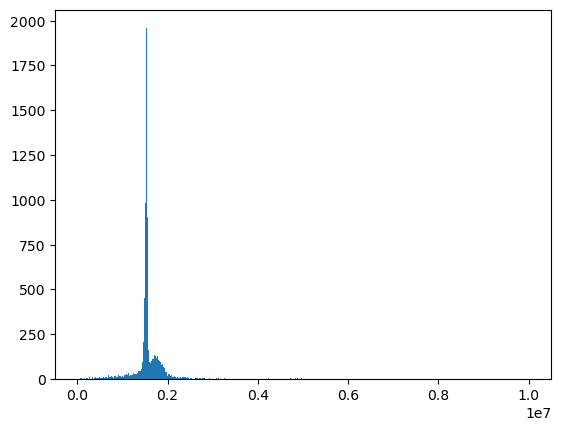

In [6]:
plt.hist(samples[:, 0].flatten(), bins='auto')
plt.show()

dyplot:

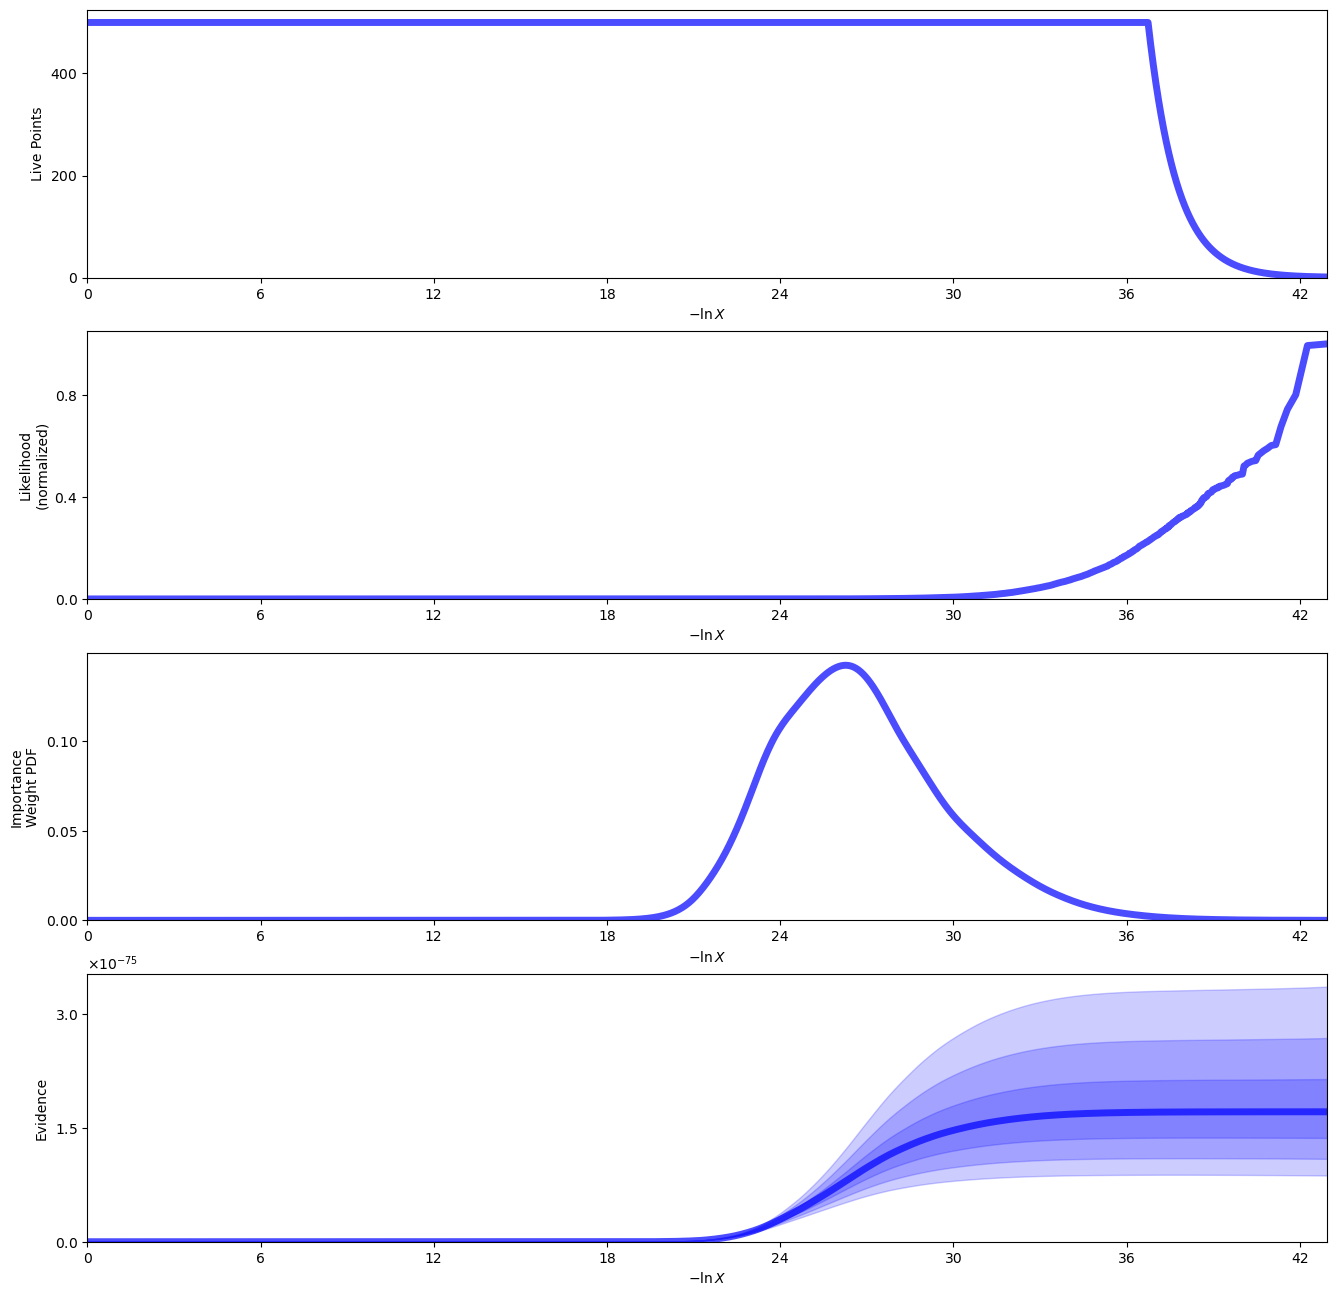

In [7]:
from dynesty import plotting as dyplot
fig, axes = dyplot.runplot(results)#, lnz_truth=lnz_truth)  # summary (run) plot

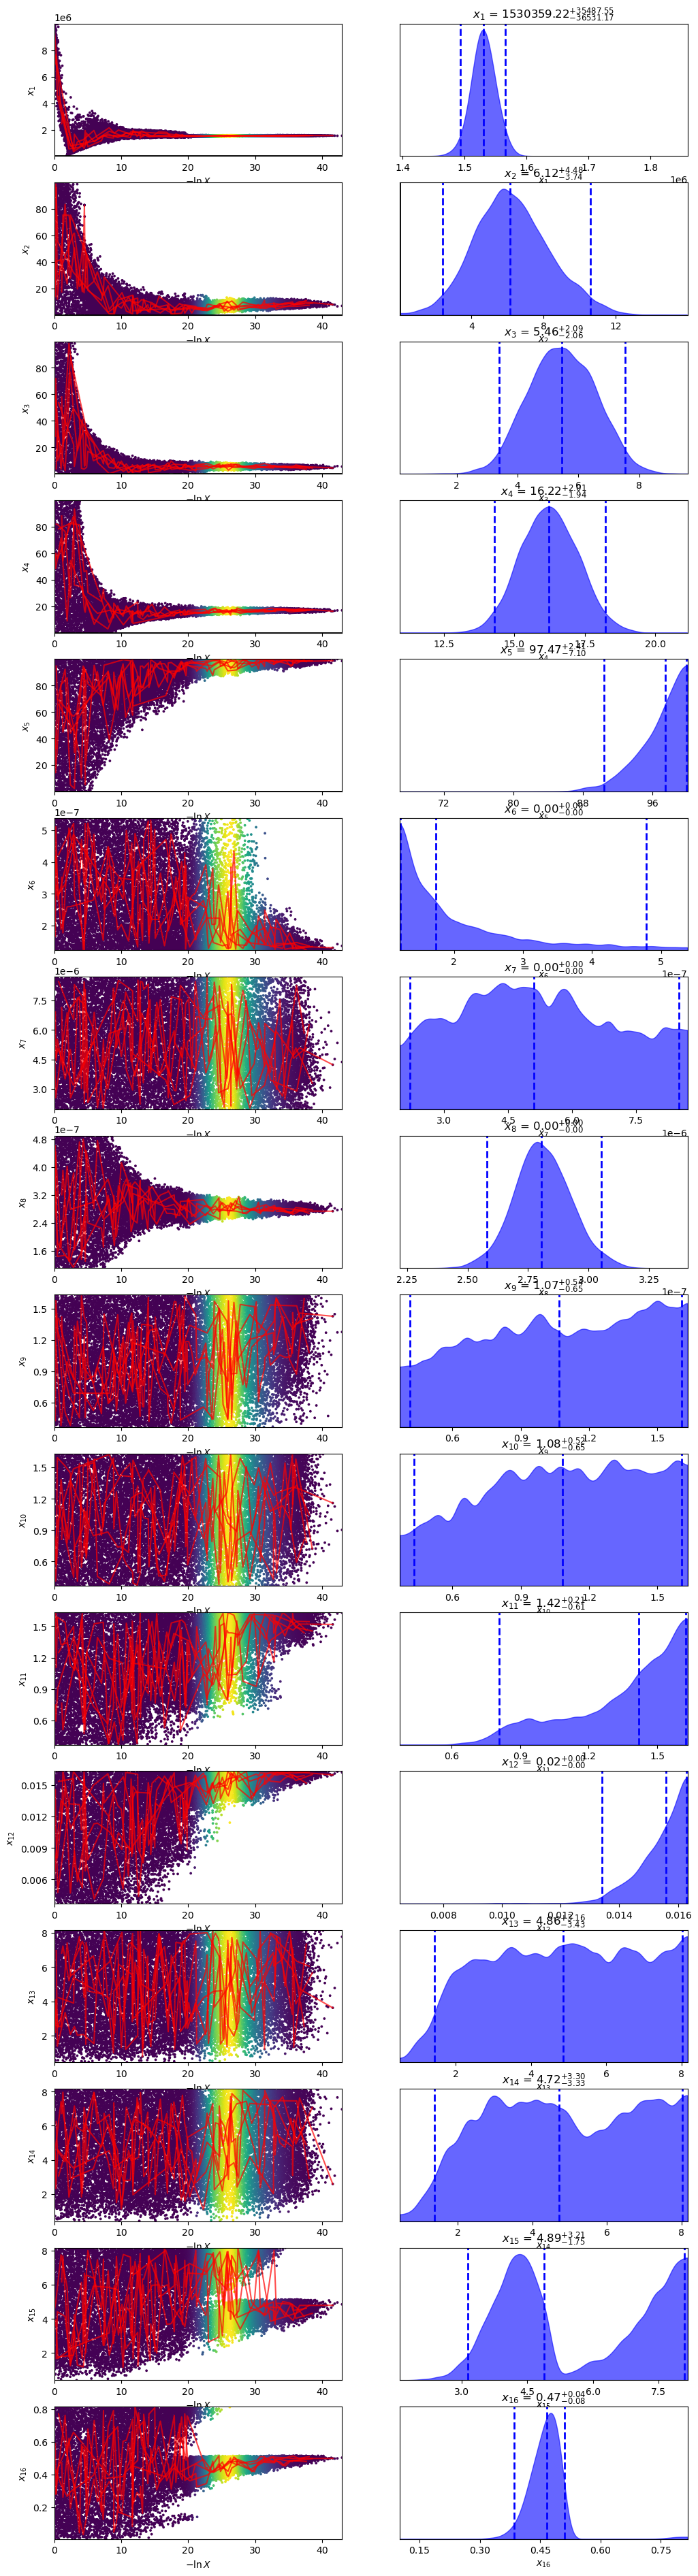

In [8]:
fig, axes = dyplot.traceplot(results, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))

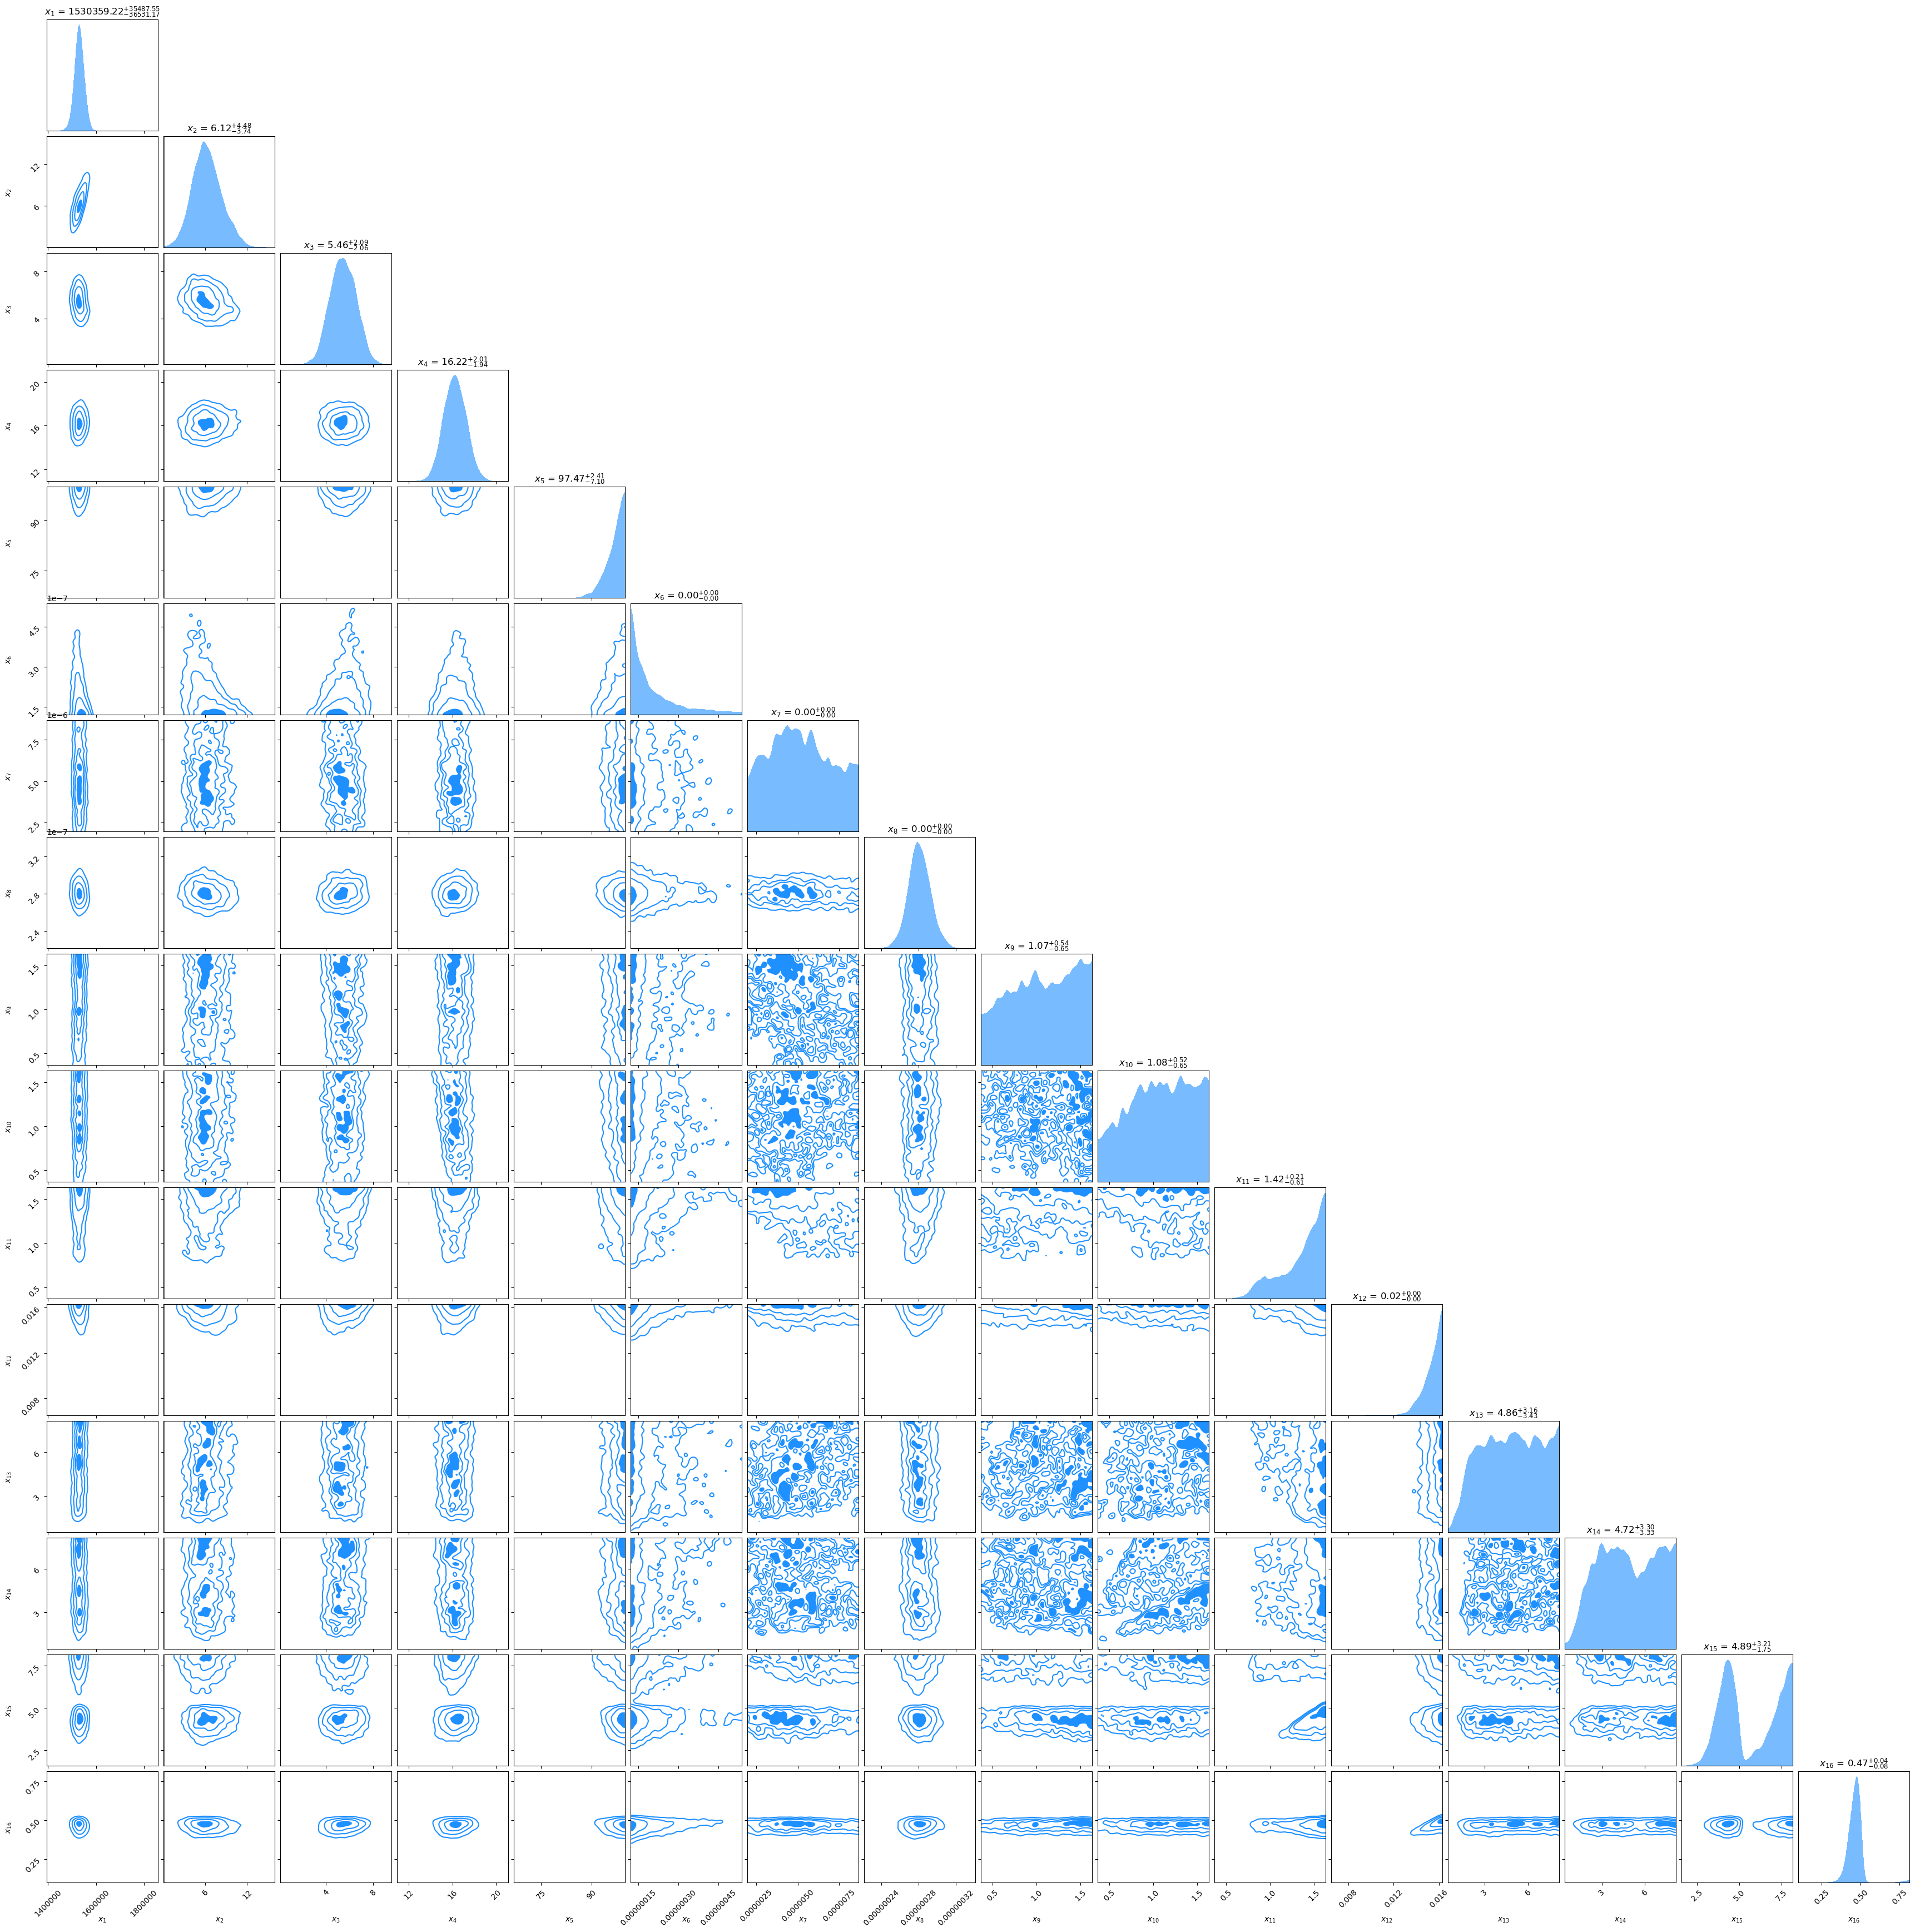

In [9]:
fg, ax = dyplot.cornerplot(results, color='dodgerblue', truths=np.zeros(ndim),
                           truth_color='black', show_titles=True,
                           quantiles=None, max_n_ticks=3)

In [10]:
dsampler.cite

'Code and Methods:\n ================\nSpeagle (2020): ui.adsabs.harvard.edu/abs/2020MNRAS.493.3132S\nKoposov et al. (2023): doi.org/10.5281/zenodo.3348367\n\nNested Sampling:\n===============\nSkilling (2004): ui.adsabs.harvard.edu/abs/2004AIPC..735..395S\nSkilling (2006): projecteuclid.org/euclid.ba/1340370944\nDynamic Nested Sampling:\n=======================\nHigson et al. (2019): doi.org/10.1007/s11222-018-9844-0\n\nBounding Method:\n===============\nFeroz, Hobson & Bridges (2009): ui.adsabs.harvard.edu/abs/2009MNRAS.398.1601F\n\nSampling Method:\n===============\nSkilling (2006): projecteuclid.org/euclid.ba/1340370944\n'